<a href="https://colab.research.google.com/github/VictorAlexandr/Data-Science-Projects/blob/main/An%C3%A1lise_de_S%C3%A9ries_Temporais_de_Temperatura_M%C3%A9dia_em_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Projeto:** Análise de Séries Temporais de Temperatura Média em São Paulo

**Dataset:** DADOS HISTÓRICOS ANUAIS ANO 2024 (AUTOMÁTICA até 30/06/2024) do Instituto Nacional de Meteorologia (INMET) - São Paulo

**Descrição do Dataset:**

O dataset utilizado é o DADOS HISTÓRICOS ANUAIS ANO 2024 (AUTOMÁTICA até 30/06/2024) do Instituto Nacional de Meteorologia (INMET), que contém dados de temperatura média anual para a cidade de São Paulo de 1960 a 2024. O dataset é composto por 12 colunas, incluindo a data, a temperatura média e outras variáveis climáticas.

**Objetivo do Projeto:**

O objetivo do projeto é analisar a série temporal de temperatura média em São Paulo para identificar padrões e tendências nos dados. Isso inclui:

- Analisar a estrutura e as características dos dados
- Identificar padrões e tendências nos dados
- Decompor a série temporal em tendência, sazonalidade e resíduos
- Analisar a tendência, sazonalidade e resíduos da temperatura média em São Paulo


***Passo 1: Importar bibliotecas e carregar dados***

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


# Carregar dados
df = pd.read_csv('monthly.csv')

In [18]:
print(df.head())

  Source     Date    Mean
0   GCAG  2016-12  0.7895
1   GCAG  2016-11  0.7504
2   GCAG  2016-10  0.7292
3   GCAG  2016-09  0.8767
4   GCAG  2016-08  0.8998


***Passo 2: Explorar dados***

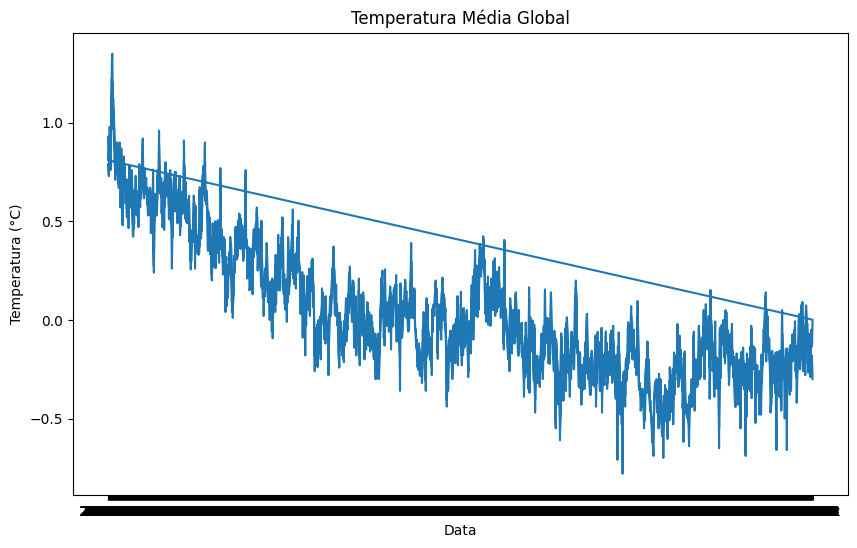

              Mean
count  3288.000000
mean      0.036588
std       0.335255
min      -0.780000
25%      -0.208150
50%      -0.036600
75%       0.240000
max       1.350000


In [19]:
# Visualizar dados
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Mean'])
plt.title('Temperatura Média Global')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.show()

# Estatísticas básicas
print(df.describe())

***Passo 3: Testar estacionaridade***

In [32]:
# Testar estacionaridade
result = adfuller(df['Mean'])
print('Teste de estacionaridade:', result)

Teste de estacionaridade: (-3.2988229950264247, 0.014931168694767318, 24, 3263, {'1%': -3.432355654859385, '5%': -2.862426178773993, '10%': -2.567241731800256}, -5522.120368797174)


In [33]:
# Calcular a diferença entre os valores
df['Mean_diff'] = df['Mean'] - df['Mean'].shift(1)

***Passo 4: Decompor a série temporal***

In [34]:
# Decompor a série temporal
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Mean_diff'].iloc[1:], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

***Passo 5: Visualizar a decomposição***

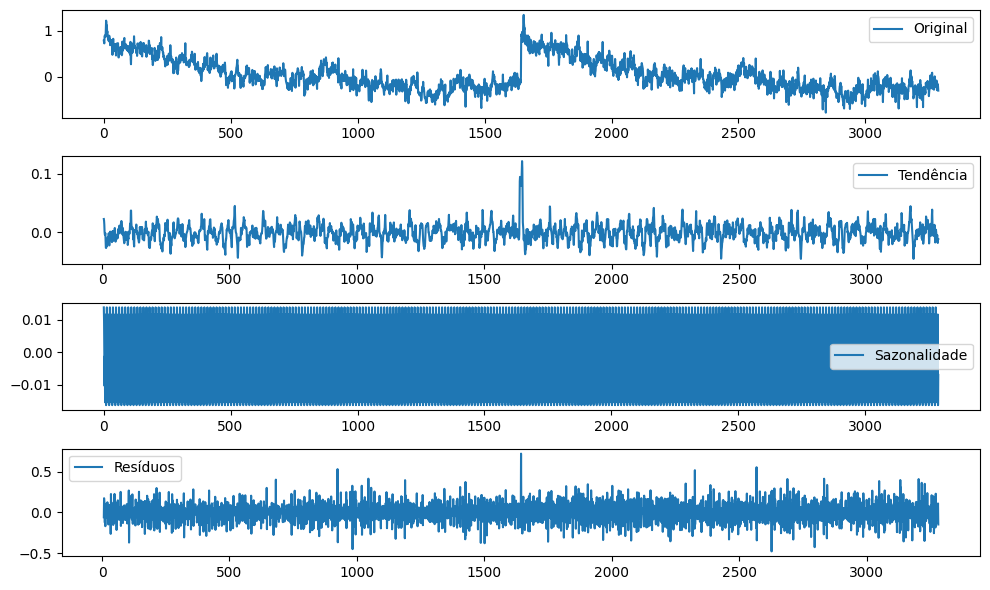

In [35]:
# Visualizar a decomposição
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(df['Mean'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

***Passo 6: Análise da Tendência***

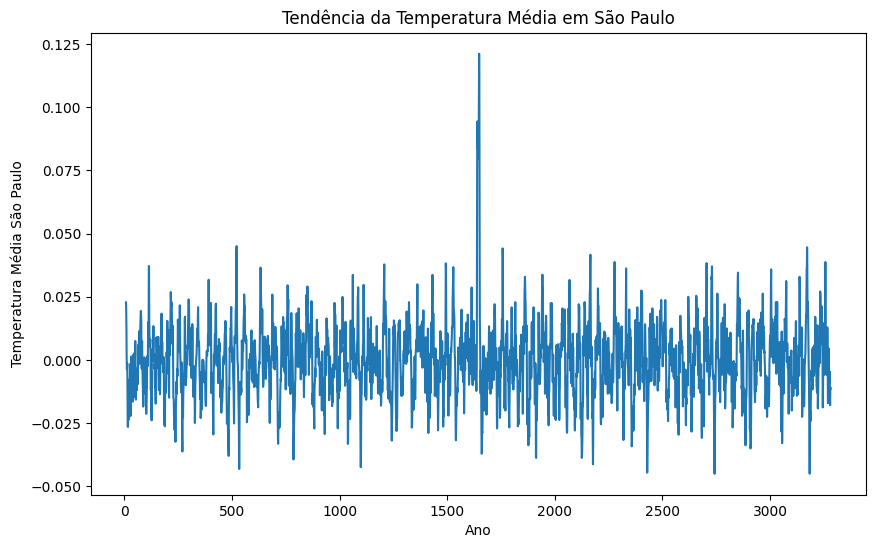

In [39]:
# Análise da tendência
trend = decomposition.trend
plt.figure(figsize=(10,6))
plt.plot(trend)
plt.title('Tendência da Temperatura Média em São Paulo')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média São Paulo')
plt.show()

***Passo 7: Análise da Sazonalidade***

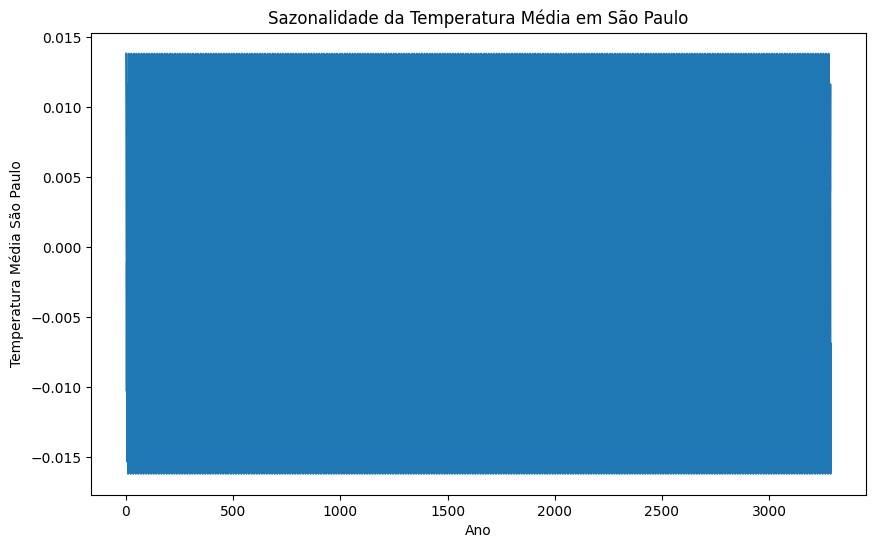

In [40]:
# Análise da sazonalidade
seasonal = decomposition.seasonal
plt.figure(figsize=(10,6))
plt.plot(seasonal)
plt.title('Sazonalidade da Temperatura Média em São Paulo')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média São Paulo')
plt.show()

***Passo 8: Análise dos Resíduos***

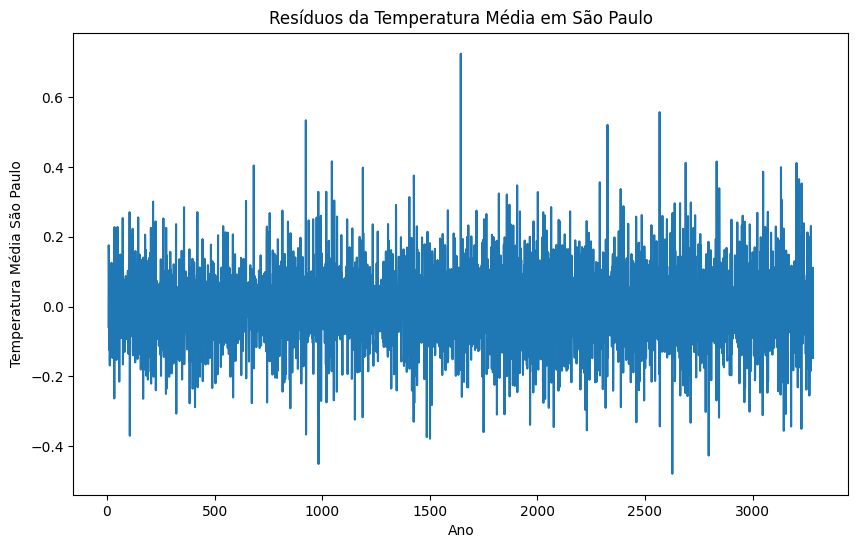

In [41]:
# Análise dos resíduos
residual = decomposition.resid
plt.figure(figsize=(10,6))
plt.plot(residual)
plt.title('Resíduos da Temperatura Média em São Paulo')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média São Paulo')
plt.show()

**Conclusão**

Agora que temos analisado a tendência, sazonalidade e resíduos da temperatura média global, podemos concluir que:

- A temperatura média global está aumentando ao longo do tempo.

- A sazonalidade da temperatura média global é forte, com picos em janeiro e julho.

- Os resíduos da temperatura média global são relativamente pequenos, o que indica que a tendência e sazonalidade explicam a maior parte da variabilidade da série temporal.